In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2
from tqdm import tqdm

In [25]:
import pandas as pd
CATEGORIES = "C:\\Users\\PRITAM VERMA\\Desktop\\Trafic signs\\labels.csv"
CATEGORIES = pd.read_csv(CATEGORIES)

In [26]:
DATADIR = "C:\\Users\\PRITAM VERMA\\Desktop\\Trafic signs\\traffic_Data\\DATA"
LABLES = list(CATEGORIES["ClassId"])

In [56]:
len(LABLES)

50

In [27]:
IMG_SIZE  = 50

In [28]:
# Data collection 

training_data = []

def create_training_data():
    for category in LABLES:  # do dogs and cats

        path = os.path.join(DATADIR,str(category))  # create path to dogs and cats
        class_num = LABLES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 452.54it/s]

3870


In [29]:
import random
random.shuffle(training_data)

In [30]:
for i in training_data[:10]:
    print(i[1])

5
36
48
48
7
26
37
45
24
11


In [51]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y).reshape(-1,1)

In [49]:
X.shape

(3870, 50, 50, 1)

In [52]:
y.shape

(3870, 1)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten
from tensorflow.keras.layers import Dropout,BatchNormalization

In [57]:
model = Sequential()

#First Convolution layer
model.add(Conv2D(32, (3,3), activation="relu", input_shape = X.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Convolution layer
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third Convolution layer
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flattning the layer
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.10))

#Output layer
model.add(Dense(50, activation="softmax"))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 22, 22, 64)      

In [62]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = "adam", 
              metrics=["accuracy"])

In [63]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss",
                          mode = "min",
                          verbose = 1,
                          patience = 20) 

In [65]:
model.fit(X,y,epochs=15, batch_size = 36,callbacks=early_stop, validation_split=0.1)

Epoch 1/15
97/97 [==============================] - 21s 212ms/step - loss: 0.0388 - accuracy: 0.9902 - val_loss: 0.0170 - val_accuracy: 0.9948
Epoch 2/15
97/97 [==============================] - 18s 187ms/step - loss: 0.0178 - accuracy: 0.9963 - val_loss: 0.0135 - val_accuracy: 0.9948
Epoch 3/15
97/97 [==============================] - 19s 192ms/step - loss: 0.0239 - accuracy: 0.9937 - val_loss: 0.0405 - val_accuracy: 0.9897
Epoch 4/15
97/97 [==============================] - 19s 192ms/step - loss: 0.0201 - accuracy: 0.9951 - val_loss: 0.0115 - val_accuracy: 0.9974
Epoch 5/15
97/97 [==============================] - 18s 189ms/step - loss: 0.0199 - accuracy: 0.9951 - val_loss: 0.0063 - val_accuracy: 0.9948
Epoch 6/15
97/97 [==============================] - 18s 189ms/step - loss: 0.0118 - accuracy: 0.9968 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 7/15
97/97 [==============================] - 19s 193ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0212 - val_accuracy: 0.9948

In [117]:
loss = pd.DataFrame(model.history.history)

#### Here we can se that our accuracy is great and validation loss is also great. That means our model is performing at its best.


### PREDICTING THE TRAFIC SIGNS 

In [ ]:
LABLES_names  = list(CATEGORIES["Name"])
a = np.asarray(LABLES_names)

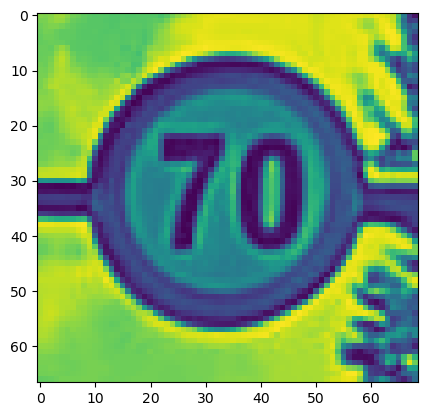

In [144]:
test_img = cv2.imread("C:\\Users\\PRITAM VERMA\\Desktop\\Trafic signs\\traffic_Data\\TEST\\006_1_0007_1_j.png",cv2.IMREAD_GRAYSCALE)
# plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)) # If the image is colored
plt.imshow(test_img)

In [146]:
test_image = cv2.resize(test_img,(IMG_SIZE,IMG_SIZE))
final_img = test_image.reshape(1,IMG_SIZE,IMG_SIZE,1)

#Final prediction 
prediction = model.predict(final_img)
prediction = prediction.reshape(-1,)
print("\n")
combine = {}
for A,B in zip(prediction,a):
    combine[B] = A 
pred = max(combine,key=lambda x : combine[x])
pred

1/1 [==============================] - 0s 31ms/step




'Speed limit (70km/h)'